## 1. Linearity Assumption
We'll create a simple dataset with a linear relationship, and another where the relationship is nonlinear to demonstrate violation.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [4]:
# Step 1: Generate synthetic data for the example
np.random.seed(0)
n = 100
X1 = np.random.normal(0, 1, n)
X2 = X1 + np.random.normal(0, 0.1, n)  # Highly correlated with X1
X3 = np.random.normal(0, 1, n)
y = 2 + 3 * X1 + 2 * X2 + 4 * X3 + np.random.normal(0, 2, n)  # Linear relationship with noise

# Create a DataFrame
df = pd.DataFrame({'y': y, 'X1': X1, 'X2': X2, 'X3': X3})

In [5]:
# Add a constant to the model
X = sm.add_constant(df[['X1', 'X2', 'X3']])
y = df['y']

In [6]:
# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     418.9
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           5.40e-55
Time:                        20:25:35   Log-Likelihood:                -202.51
No. Observations:                 100   AIC:                             413.0
Df Residuals:                      96   BIC:                             423.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6183      0.188      8.589      0.0

## Step 2: Check Assumptions

## 1. Linearity: Plot observed vs predicted values

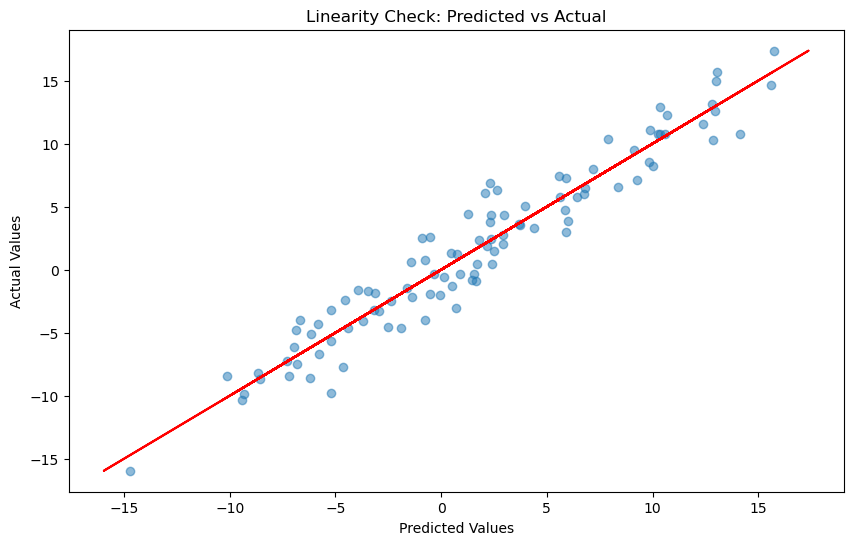

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, y, alpha=0.5)
plt.plot(y, y, color="red")  # Line of perfect fit
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Linearity Check: Predicted vs Actual")
plt.show()

In [8]:
# 2. Independence (No Autocorrelation): Durbin-Watson Test
dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_statistic} (close to 2 indicates no autocorrelation)')

Durbin-Watson statistic: 2.0756784686099303 (close to 2 indicates no autocorrelation)


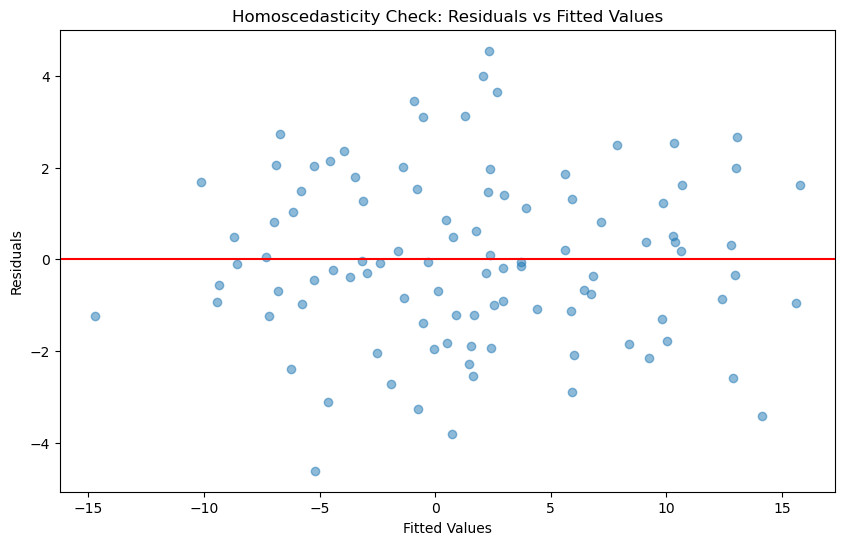

In [9]:
# 3. Homoscedasticity (Constant Variance of Errors): Residual plot and Breusch-Pagan test
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Fitted Values")
plt.show()

In [10]:
# Breusch-Pagan Test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f'Breusch-Pagan test p-value: {bp_test[1]} (p < 0.05 indicates heteroscedasticity)')

Breusch-Pagan test p-value: 0.8676747331050731 (p < 0.05 indicates heteroscedasticity)


In [11]:
# 4. Multicollinearity: Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
  Feature        VIF
0   const   1.013836
1      X1  99.465752
2      X2  99.534999
3      X3   1.008147


<Figure size 1000x600 with 0 Axes>

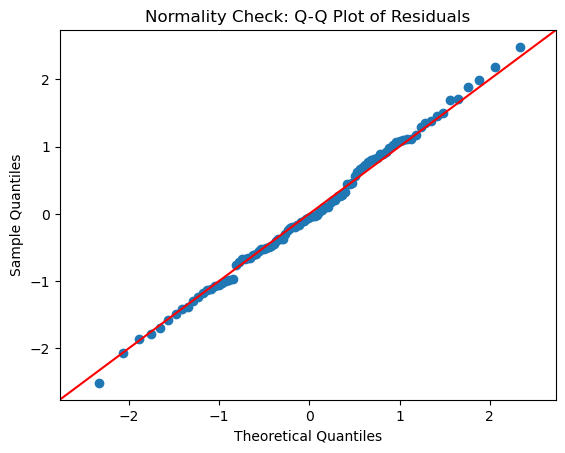

In [12]:
# 5. Normality of Residuals: Q-Q Plot and Shapiro-Wilk test
plt.figure(figsize=(10, 6))
sm.qqplot(model.resid, line='45', fit=True)
plt.title("Normality Check: Q-Q Plot of Residuals")
plt.show()

In [13]:
# Shapiro-Wilk Test
shapiro_test = shapiro(model.resid)
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue} (p > 0.05 indicates normality)')

Shapiro-Wilk test p-value: 0.9831984043121338 (p > 0.05 indicates normality)


In [14]:
# 6. No Endogeneity: This is hard to test directly without known instruments, so we typically check for omitted variables or use domain knowledge to validate.
# Endogeneity requires external data and specific tests such as the Hausman test in econometrics.

## 2. Independence of Errors (No Autocorrelation)

To simulate this, we'll generate time-series data. One set will have autocorrelation, while another will not.

Durbin-Watson for independent errors: 2.08 (should be close to 2)
Durbin-Watson for autocorrelated errors: 0.16 (closer to 0 or 4 indicates autocorrelation)


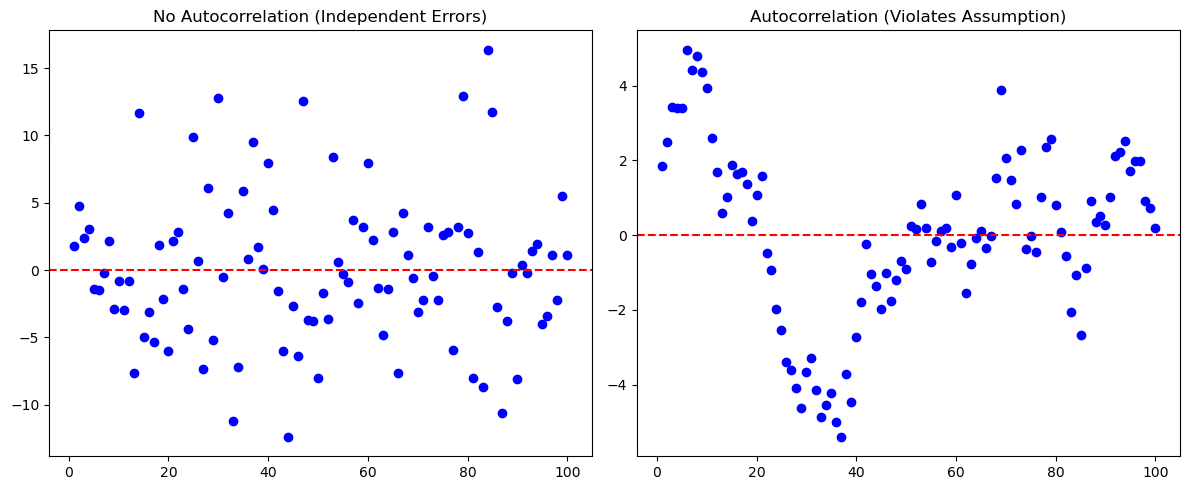

In [4]:
from statsmodels.stats.stattools import durbin_watson

# Independent residuals (satisfies assumption)
y_no_auto = np.linspace(1, 100, 100) + np.random.randn(100) * 5

# Autocorrelated residuals (violates assumption)
y_auto = np.cumsum(np.random.randn(100))  # Simulates autocorrelation

# Fit models
model_no_auto = LinearRegression().fit(X, y_no_auto)
model_auto = LinearRegression().fit(X, y_auto)

# Durbin-Watson test
dw_no_auto = durbin_watson(y_no_auto - model_no_auto.predict(X))
dw_auto = durbin_watson(y_auto - model_auto.predict(X))

print(f'Durbin-Watson for independent errors: {dw_no_auto:.2f} (should be close to 2)')
print(f'Durbin-Watson for autocorrelated errors: {dw_auto:.2f} (closer to 0 or 4 indicates autocorrelation)')

# Plot residuals for autocorrelation assumption
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y_no_auto - model_no_auto.predict(X), color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('No Autocorrelation (Independent Errors)')

plt.subplot(1, 2, 2)
plt.scatter(X, y_auto - model_auto.predict(X), color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Autocorrelation (Violates Assumption)')

plt.tight_layout()
plt.show()

## 3. Homoscedasticity (Constant Variance of Errors)

We'll generate data where residuals have constant variance and where variance increases as the value of the independent variable increases (heteroscedasticity).

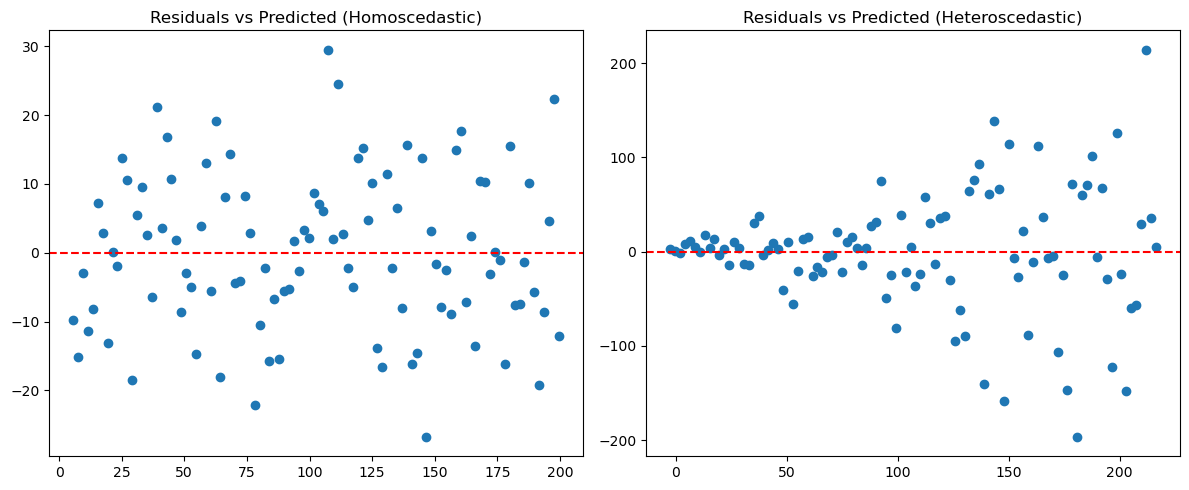

In [5]:
# Homoscedastic data (satisfies assumption)
y_homoscedastic = 2 * X.flatten() + np.random.randn(100) * 10

# Heteroscedastic data (violates assumption)
y_heteroscedastic = 2 * X.flatten() + (np.random.randn(100) * X.flatten())

# Fit models
model_homoscedastic = LinearRegression().fit(X, y_homoscedastic)
model_heteroscedastic = LinearRegression().fit(X, y_heteroscedastic)

# Residuals
residuals_homo = y_homoscedastic - model_homoscedastic.predict(X)
residuals_hetero = y_heteroscedastic - model_heteroscedastic.predict(X)

# Plot residuals vs fitted values (Homoscedasticity)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(model_homoscedastic.predict(X), residuals_homo)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Homoscedastic)')

plt.subplot(1, 2, 2)
plt.scatter(model_heteroscedastic.predict(X), residuals_hetero)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted (Heteroscedastic)')

plt.tight_layout()
plt.show()

## 4. Multicollinearity
We’ll create data where two independent variables are highly correlated, leading to multicollinearity.\
Interpretation: A VIF greater than 10 indicates high multicollinearity.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Two highly correlated variables (violates assumption)
X1 = np.random.rand(100)
X2 = X1 + np.random.normal(0, 0.01, 100)  # Strongly correlated with X1
X3 = np.random.rand(100)  # Not correlated with X1

X_multicollinear = np.column_stack([X1, X2, X3])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = ['X1', 'X2', 'X3']
vif_data["VIF"] = [variance_inflation_factor(X_multicollinear, i) for i in range(X_multicollinear.shape[1])]

print(vif_data)

  feature          VIF
0      X1  2830.809341
1      X2  2827.608504
2      X3     2.130666


## 5.Normality of Residuals

To demonstrate this, we’ll create a normally distributed residual set and another with skewed residuals.

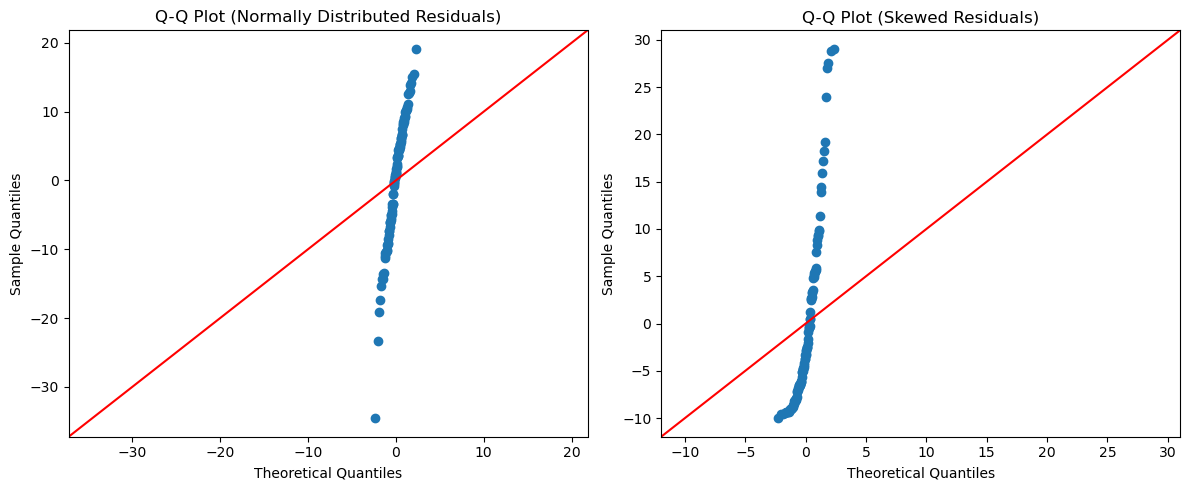

In [7]:
import statsmodels.api as sm

# Normally distributed residuals (satisfies assumption)
y_normal = 2 * X.flatten() + np.random.randn(100) * 10

# Skewed residuals (violates assumption)
y_skewed = 2 * X.flatten() + np.random.exponential(scale=10, size=100)

# Fit models
model_normal = LinearRegression().fit(X, y_normal)
model_skewed = LinearRegression().fit(X, y_skewed)

# Residuals
residuals_normal = y_normal - model_normal.predict(X)
residuals_skewed = y_skewed - model_skewed.predict(X)

# Q-Q plot (Normality)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sm.qqplot(residuals_normal, line='45', ax=plt.gca())
plt.title('Q-Q Plot (Normally Distributed Residuals)')

plt.subplot(1, 2, 2)
sm.qqplot(residuals_skewed, line='45', ax=plt.gca())
plt.title('Q-Q Plot (Skewed Residuals)')

plt.tight_layout()
plt.show()

## Visualizing the Assumptions
You can check these assumptions using diagnostic plots in Python. Here’s an example of how to create some of these plots:

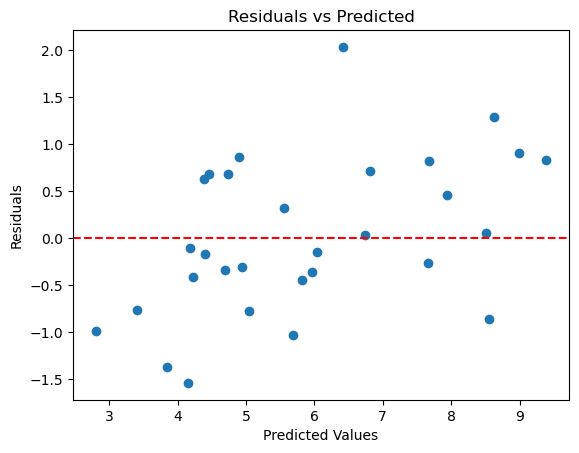

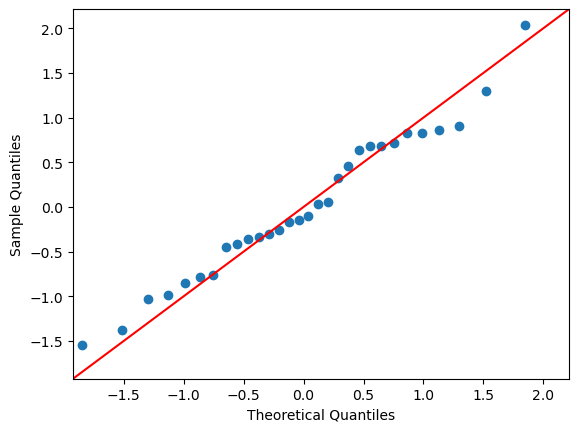

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Example dataset
np.random.seed(42)
X = np.random.rand(100, 3)
y = 1 + 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Residual plot (for checking homoscedasticity)
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Q-Q plot (for checking normality of residuals)
sm.qqplot(residuals, line ='45')
plt.show()

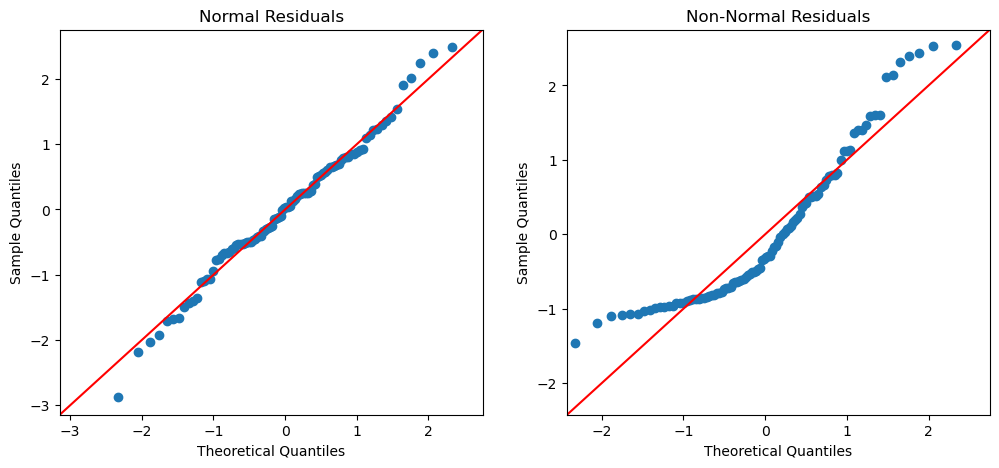

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# Function to generate data
def generate_data(n=100, linear=True, homoscedastic=True, normal_residuals=True):
    np.random.seed(0)
    X1 = np.random.normal(0, 1, n)
    X2 = np.random.normal(0, 1, n)
    y = 2 + 3 * X1 + 2 * X2
    
    # Modify residuals behavior
    if not linear:
        y += 0.5 * X1**2  # Adds a quadratic component to break linearity
    if not homoscedastic:
        y += X1 * np.random.normal(0, 1, n)  # Adds heteroscedasticity
    if not normal_residuals:
        y += np.random.exponential(1, n)  # Non-normal residuals
    else:
        y += np.random.normal(0, 1, n)  # Normal residuals
    
    return pd.DataFrame({'y': y, 'X1': X1, 'X2': X2})

# Create data that meets assumptions and data that does not
data_good = generate_data(linear=True, homoscedastic=True, normal_residuals=True)
data_bad = generate_data(linear=False, homoscedastic=False, normal_residuals=False)

# Define models for both datasets
X_good = sm.add_constant(data_good[['X1', 'X2']])
y_good = data_good['y']
model_good = sm.OLS(y_good, X_good).fit()

X_bad = sm.add_constant(data_bad[['X1', 'X2']])
y_bad = data_bad['y']
model_bad = sm.OLS(y_bad, X_bad).fit()

# Plot 3: Normality of Residuals - Q-Q Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sm.qqplot(model_good.resid, line='45', fit=True, ax=axs[0])
axs[0].set_title("Normal Residuals")

sm.qqplot(model_bad.resid, line='45', fit=True, ax=axs[1])
axs[1].set_title("Non-Normal Residuals")
plt.show()